# Central Finite Difference

In [1]:
import numpy as np
from matplotlib import pyplot as plt

'''
    This code implements the Central Finite Difference Scheme for the Light Deflection Second 
    Order ODE. Line 8 implements the FD function which can be changed along with Boundary Conditions
    to generalize the code for other ODE. 
    
    Resources used to complete this task include Chapter 08.07
    of Finite Difference Method for Ordinary Differential Equations and the algorithm was inspired by 
    Daniel Hnyk's work on Finite Difference for Second Order ODE
'''

#set parameters here
g1 = 0
g2 = 0 
Exact = list()
Exact.append(0)
m = 75
h = (75)/m 
net = [i*h for i in range(m+1)]  

#set according to your second order differential equation 
f = lambda x: 7.5 * (10**(-7))* x*(75-x) # f(x)  
p = lambda x: -1  # p(x)  
q = lambda x: -0.000002   # q(x)
def exact(x):
    return((0.375*(x)**2)-(28.125*(x))+(3.75*(10**5))-((1.775656266*(10**5)))*np.exp( 0.0014142*(x))-(1.974343774*(10**5))*np.exp(-0.0014142*(x)))


P = [p(i*h) for i in range(m+1)]  
Q = [q(i*h) for i in range(m+1)]  
F = [-f(i*h) for i in range(1,m)] 
A = [-(P[i+1]/h**2) for i in range(m-1)] 
C = [-(P[i+1]+P[i+2])/h**2 - Q[i+1] for i in range(m-1)]  
B = [-(P[i+2]/h**2) for i in range(m-1)]  
alphas = [0]  
betas = [g1]  
for i in range(m-1):  
    alphas.append(B[i] / (C[i] - alphas[i]*A[i]))
    betas.append((betas[i]*A[i] + F[i]) / (C[i]-alphas[i]*A[i]))
u = [g2]  
for i in range(m):  
    u.insert(0, alphas[m-i-1]*u[0]+betas[m-i-1]) 
    Exact.append(exact(np.array(i)))

# Error Calculation 

In [2]:
#Error Calculation 
Err = list()

for i in range(len(Exact)):
    Err.append(abs((Exact[i]-u[i])))
error = np.mean(Err)

# Results 

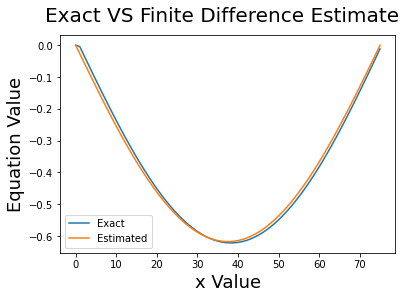

Avergae Relative Error =  1.1792639604421993 %


In [3]:
plt.plot(net, Exact, u)
plt.legend(['Exact', 'Estimated'])
plt.suptitle('Exact VS Finite Difference Estimate', fontsize=20)
plt.xlabel('x Value', fontsize=18)
plt.ylabel('Equation Value', fontsize=18)
plt.savefig('FD.png')
plt.show()

print("Avergae Relative Error = ",error*100, "%")